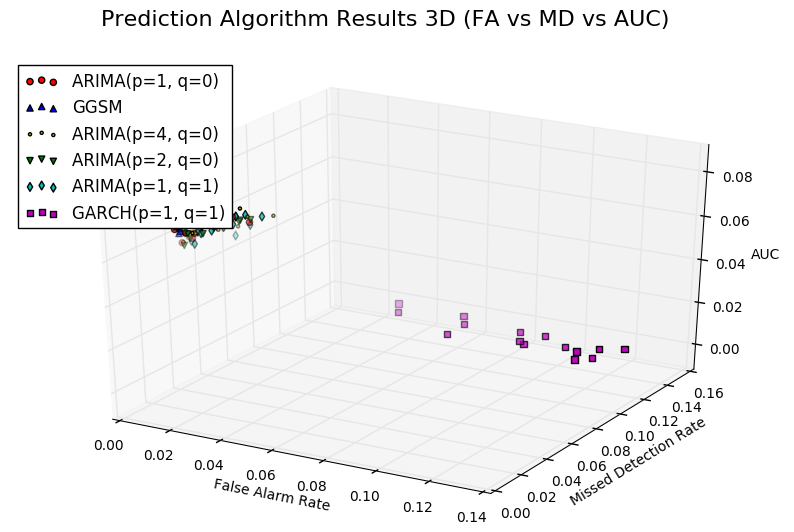

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

r = [
 'Model=GGSM, ROC AUC=0.0812241749919, Past Prediction Horizon=96, Future Prediction Horizon=18, Threshold=3.275, FA=0.0203327171904, MD=0.0203327171904',
 'Model=ARIMA(p=4, q=0), ROC AUC=0.0806756170107, Past Prediction Horizon=48, Future Prediction Horizon=18, Threshold=3.925, FA=0.0319240724763, MD=0.0310612597066',
 'Model=GGSM, ROC AUC=0.0794566717501, Past Prediction Horizon=32, Future Prediction Horizon=18, Threshold=3.225, FA=0.0198446937015, MD=0.0293356341674',
 'Model=GGSM, ROC AUC=0.0790226263732, Past Prediction Horizon=80, Future Prediction Horizon=18, Threshold=3.275, FA=0.0200364298725, MD=0.0200364298725',
 'Model=GGSM, ROC AUC=0.0788243529895, Past Prediction Horizon=96, Future Prediction Horizon=12, Threshold=3.625, FA=0.0166821130677, MD=0.0157553290083',
 'Model=ARIMA(p=1, q=0), ROC AUC=0.0781599225366, Past Prediction Horizon=48, Future Prediction Horizon=18, Threshold=3.775, FA=0.0245183887916, MD=0.0245183887916',
 'Model=ARIMA(p=2, q=0), ROC AUC=0.0779899202643, Past Prediction Horizon=48, Future Prediction Horizon=18, Threshold=3.825, FA=0.0278745644599, MD=0.0261324041812',
 'Model=GGSM, ROC AUC=0.0776906145179, Past Prediction Horizon=48, Future Prediction Horizon=18, Threshold=3.275, FA=0.0203359858532, MD=0.0194518125553',
 'Model=ARIMA(p=1, q=1), ROC AUC=0.0775582732735, Past Prediction Horizon=32, Future Prediction Horizon=12, Threshold=3.575, FA=0.0328836424958, MD=0.0328836424958',
 'Model=ARIMA(p=1, q=1), ROC AUC=0.0775134051667, Past Prediction Horizon=48, Future Prediction Horizon=18, Threshold=3.875, FA=0.0311418685121, MD=0.0294117647059',
 'Model=ARIMA(p=1, q=0), ROC AUC=0.0774383633859, Past Prediction Horizon=96, Future Prediction Horizon=18, Threshold=4.125, FA=0.0202764976959, MD=0.0230414746544',
 'Model=GGSM, ROC AUC=0.0772833609196, Past Prediction Horizon=32, Future Prediction Horizon=12, Threshold=3.625, FA=0.0172860847018, MD=0.0250648228176',
 'Model=ARIMA(p=1, q=0), ROC AUC=0.0771880744408, Past Prediction Horizon=48, Future Prediction Horizon=12, Threshold=3.775, FA=0.0193661971831, MD=0.0193661971831',
 'Model=ARIMA(p=2, q=0), ROC AUC=0.0769859719036, Past Prediction Horizon=48, Future Prediction Horizon=12, Threshold=3.825, FA=0.0227670753065, MD=0.0210157618214',
 'Model=ARIMA(p=4, q=0), ROC AUC=0.0769229202779, Past Prediction Horizon=32, Future Prediction Horizon=12, Threshold=3.675, FA=0.033698399326, MD=0.0328559393429',
 'Model=ARIMA(p=4, q=0), ROC AUC=0.0767033637913, Past Prediction Horizon=48, Future Prediction Horizon=12, Threshold=3.925, FA=0.0226283724978, MD=0.0269799825936',
 'Model=GGSM, ROC AUC=0.0766718583126, Past Prediction Horizon=80, Future Prediction Horizon=12, Threshold=3.625, FA=0.0173357664234, MD=0.0155109489051',
 'Model=ARIMA(p=4, q=0), ROC AUC=0.0766664141422, Past Prediction Horizon=32, Future Prediction Horizon=18, Threshold=3.675, FA=0.0401002506266, MD=0.0392648287385',
 'Model=ARIMA(p=1, q=0), ROC AUC=0.0764800419251, Past Prediction Horizon=64, Future Prediction Horizon=18, Threshold=3.925, FA=0.0289982425308, MD=0.030755711775',
 'Model=GGSM, ROC AUC=0.0764398637436, Past Prediction Horizon=64, Future Prediction Horizon=18, Threshold=3.275, FA=0.0197486535009, MD=0.0197486535009',
 'Model=ARIMA(p=1, q=1), ROC AUC=0.0764226731796, Past Prediction Horizon=32, Future Prediction Horizon=18, Threshold=3.475, FA=0.036974789916, MD=0.036974789916',
 'Model=ARIMA(p=1, q=0), ROC AUC=0.0763559080975, Past Prediction Horizon=80, Future Prediction Horizon=18, Threshold=4.125, FA=0.026055705301, MD=0.0269541778976',
 'Model=GGSM, ROC AUC=0.0759070294785, Past Prediction Horizon=96, Future Prediction Horizon=6, Threshold=3.875, FA=0.0174953959484, MD=0.0156537753223',
 'Model=ARIMA(p=4, q=0), ROC AUC=0.0758847308466, Past Prediction Horizon=96, Future Prediction Horizon=12, Threshold=4.225, FA=0.021978021978, MD=0.021978021978',
 'Model=ARIMA(p=1, q=1), ROC AUC=0.0758345744609, Past Prediction Horizon=48, Future Prediction Horizon=12, Threshold=3.925, FA=0.0268166089965, MD=0.0285467128028',
 'Model=GGSM, ROC AUC=0.0753926323981, Past Prediction Horizon=48, Future Prediction Horizon=12, Threshold=3.625, FA=0.0177147918512, MD=0.0150575730735',
 'Model=ARIMA(p=2, q=0), ROC AUC=0.075145968278, Past Prediction Horizon=32, Future Prediction Horizon=12, Threshold=3.575, FA=0.0312764158918, MD=0.0321217244294',
 'Model=ARIMA(p=2, q=0), ROC AUC=0.075096508246, Past Prediction Horizon=32, Future Prediction Horizon=18, Threshold=3.425, FA=0.0338123415046, MD=0.0346576500423',
 'Model=ARIMA(p=2, q=0), ROC AUC=0.0748437969862, Past Prediction Horizon=96, Future Prediction Horizon=18, Threshold=4.175, FA=0.0229568411387, MD=0.0238751147842',
 'Model=ARIMA(p=2, q=0), ROC AUC=0.0747741151774, Past Prediction Horizon=96, Future Prediction Horizon=12, Threshold=4.125, FA=0.0210622710623, MD=0.0228937728938',
 'Model=ARIMA(p=1, q=0), ROC AUC=0.0745763971463, Past Prediction Horizon=96, Future Prediction Horizon=12, Threshold=4.075, FA=0.0201649862511, MD=0.0229147571036',
 'Model=ARIMA(p=1, q=0), ROC AUC=0.0745372018512, Past Prediction Horizon=80, Future Prediction Horizon=12, Threshold=4.025, FA=0.0225428313796, MD=0.0216411181244',
 'Model=GGSM, ROC AUC=0.0744297322473, Past Prediction Horizon=32, Future Prediction Horizon=6, Threshold=3.675, FA=0.0181347150259, MD=0.0198618307427',
 'Model=ARIMA(p=2, q=0), ROC AUC=0.0743374967246, Past Prediction Horizon=64, Future Prediction Horizon=18, Threshold=3.975, FA=0.0306479859895, MD=0.0323992994746',
 'Model=GGSM, ROC AUC=0.0742095189398, Past Prediction Horizon=64, Future Prediction Horizon=12, Threshold=3.625, FA=0.016201620162, MD=0.015301530153',
 'Model=ARIMA(p=1, q=0), ROC AUC=0.0741948313741, Past Prediction Horizon=32, Future Prediction Horizon=18, Threshold=3.325, FA=0.0338409475465, MD=0.0338409475465',
 'Model=ARIMA(p=2, q=0), ROC AUC=0.0740681563683, Past Prediction Horizon=80, Future Prediction Horizon=18, Threshold=4.175, FA=0.0260323159785, MD=0.0278276481149',
 'Model=ARIMA(p=1, q=0), ROC AUC=0.0739966107434, Past Prediction Horizon=64, Future Prediction Horizon=12, Threshold=3.875, FA=0.0255731922399, MD=0.0255731922399',
 'Model=GGSM, ROC AUC=0.073836456181, Past Prediction Horizon=80, Future Prediction Horizon=6, Threshold=3.875, FA=0.0172413793103, MD=0.0154264972777',
 'Model=ARIMA(p=2, q=0), ROC AUC=0.0737402100392, Past Prediction Horizon=80, Future Prediction Horizon=12, Threshold=4.075, FA=0.0225428313796, MD=0.0216411181244',
 'Model=ARIMA(p=1, q=1), ROC AUC=0.0734596495145, Past Prediction Horizon=80, Future Prediction Horizon=18, Threshold=4.225, FA=0.0294380017841, MD=0.0303300624442',
 'Model=ARIMA(p=1, q=0), ROC AUC=0.0734260351366, Past Prediction Horizon=32, Future Prediction Horizon=12, Threshold=3.475, FA=0.028085106383, MD=0.0289361702128',
 'Model=ARIMA(p=4, q=0), ROC AUC=0.0734077963688, Past Prediction Horizon=80, Future Prediction Horizon=12, Threshold=4.075, FA=0.0216411181244, MD=0.0225428313796',
 'Model=ARIMA(p=1, q=1), ROC AUC=0.0733024119336, Past Prediction Horizon=32, Future Prediction Horizon=6, Threshold=3.825, FA=0.0214408233276, MD=0.0231560891938',
 'Model=ARIMA(p=4, q=0), ROC AUC=0.0729931207562, Past Prediction Horizon=96, Future Prediction Horizon=18, Threshold=4.225, FA=0.025641025641, MD=0.0238095238095',
 'Model=ARIMA(p=1, q=0), ROC AUC=0.0726797522238, Past Prediction Horizon=48, Future Prediction Horizon=6, Threshold=3.925, FA=0.0150044130627, MD=0.0158870255958',
 'Model=GGSM, ROC AUC=0.0726299846384, Past Prediction Horizon=48, Future Prediction Horizon=6, Threshold=3.875, FA=0.0176211453744, MD=0.0149779735683',
 'Model=ARIMA(p=1, q=1), ROC AUC=0.0725510488689, Past Prediction Horizon=96, Future Prediction Horizon=12, Threshold=4.325, FA=0.024567788899, MD=0.0254777070064',
 'Model=ARIMA(p=4, q=0), ROC AUC=0.0725442176871, Past Prediction Horizon=96, Future Prediction Horizon=6, Threshold=4.125, FA=0.0219981668194, MD=0.0155820348304',
 'Model=ARIMA(p=4, q=0), ROC AUC=0.0724530526684, Past Prediction Horizon=64, Future Prediction Horizon=18, Threshold=3.925, FA=0.0306748466258, MD=0.0315512708151',
 'Model=ARIMA(p=1, q=1), ROC AUC=0.0723451829854, Past Prediction Horizon=64, Future Prediction Horizon=18, Threshold=4.025, FA=0.0330722367276, MD=0.035683202785',
 'Model=ARIMA(p=1, q=1), ROC AUC=0.0722459060164, Past Prediction Horizon=80, Future Prediction Horizon=12, Threshold=4.225, FA=0.0267379679144, MD=0.0285204991087',
 'Model=ARIMA(p=4, q=0), ROC AUC=0.0720538180623, Past Prediction Horizon=32, Future Prediction Horizon=6, Threshold=3.925, FA=0.0197424892704, MD=0.0240343347639',
 'Model=ARIMA(p=1, q=0), ROC AUC=0.0720272108844, Past Prediction Horizon=96, Future Prediction Horizon=6, Threshold=4.175, FA=0.0193014705882, MD=0.015625',
 'Model=ARIMA(p=2, q=0), ROC AUC=0.0719966556571, Past Prediction Horizon=64, Future Prediction Horizon=12, Threshold=3.925, FA=0.0246696035242, MD=0.0273127753304',
 'Model=ARIMA(p=4, q=0), ROC AUC=0.0718036131341, Past Prediction Horizon=64, Future Prediction Horizon=12, Threshold=3.925, FA=0.0204444444444, MD=0.0231111111111',
 'Model=ARIMA(p=2, q=0), ROC AUC=0.0717959183673, Past Prediction Horizon=96, Future Prediction Horizon=6, Threshold=4.175, FA=0.020202020202, MD=0.0156106519743',
 'Model=ARIMA(p=1, q=1), ROC AUC=0.0717141679753, Past Prediction Horizon=96, Future Prediction Horizon=18, Threshold=4.225, FA=0.0247479376719, MD=0.0238313473877',
 'Model=ARIMA(p=4, q=0), ROC AUC=0.0716687850387, Past Prediction Horizon=80, Future Prediction Horizon=18, Threshold=4.125, FA=0.0260791366906, MD=0.0260791366906',
 'Model=GGSM, ROC AUC=0.0714848247751, Past Prediction Horizon=64, Future Prediction Horizon=6, Threshold=3.875, FA=0.0169946332737, MD=0.0152057245081',
 'Model=ARIMA(p=1, q=1), ROC AUC=0.0713945578231, Past Prediction Horizon=96, Future Prediction Horizon=6, Threshold=4.225, FA=0.0209854014599, MD=0.0209854014599',
 'Model=ARIMA(p=2, q=0), ROC AUC=0.0709933795113, Past Prediction Horizon=32, Future Prediction Horizon=6, Threshold=3.775, FA=0.0231759656652, MD=0.0206008583691',
 'Model=ARIMA(p=1, q=1), ROC AUC=0.0705998818849, Past Prediction Horizon=48, Future Prediction Horizon=6, Threshold=3.975, FA=0.0217770034843, MD=0.0217770034843',
 'Model=ARIMA(p=4, q=0), ROC AUC=0.0704945404959, Past Prediction Horizon=48, Future Prediction Horizon=6, Threshold=3.975, FA=0.0200873362445, MD=0.02096069869',
 'Model=ARIMA(p=1, q=0), ROC AUC=0.0704857227582, Past Prediction Horizon=32, Future Prediction Horizon=6, Threshold=3.775, FA=0.0198105081826, MD=0.0206718346253',
 'Model=ARIMA(p=2, q=0), ROC AUC=0.0702274544544, Past Prediction Horizon=48, Future Prediction Horizon=6, Threshold=3.975, FA=0.0157894736842, MD=0.0210526315789',
 'Model=ARIMA(p=1, q=1), ROC AUC=0.0682407477785, Past Prediction Horizon=64, Future Prediction Horizon=12, Threshold=3.975, FA=0.0296684118674, MD=0.0314136125654',
 'Model=ARIMA(p=1, q=0), ROC AUC=0.0680609773698, Past Prediction Horizon=80, Future Prediction Horizon=6, Threshold=4.175, FA=0.0189189189189, MD=0.0207207207207',
 'Model=ARIMA(p=4, q=0), ROC AUC=0.068028417151, Past Prediction Horizon=80, Future Prediction Horizon=6, Threshold=4.125, FA=0.0171480144404, MD=0.0207581227437',
 'Model=ARIMA(p=2, q=0), ROC AUC=0.0676632146968, Past Prediction Horizon=80, Future Prediction Horizon=6, Threshold=4.175, FA=0.0180342651037, MD=0.0207394048693',
 'Model=ARIMA(p=4, q=0), ROC AUC=0.0668799819599, Past Prediction Horizon=64, Future Prediction Horizon=6, Threshold=3.975, FA=0.0169491525424, MD=0.0178412132025',
 'Model=ARIMA(p=1, q=1), ROC AUC=0.0664958868524, Past Prediction Horizon=80, Future Prediction Horizon=6, Threshold=4.275, FA=0.018018018018, MD=0.0216216216216',
 'Model=ARIMA(p=1, q=1), ROC AUC=0.0662683946003, Past Prediction Horizon=64, Future Prediction Horizon=6, Threshold=4.025, FA=0.0204081632653, MD=0.019520851819',
 'Model=ARIMA(p=1, q=0), ROC AUC=0.0661885294912, Past Prediction Horizon=64, Future Prediction Horizon=6, Threshold=3.925, FA=0.0160570918822, MD=0.0187332738626',
 'Model=ARIMA(p=2, q=0), ROC AUC=0.0658302042155, Past Prediction Horizon=64, Future Prediction Horizon=6, Threshold=3.925, FA=0.0178412132025, MD=0.0169491525424',
 'Model=GARCH(p=1, q=1), ROC AUC=0.00631931864093, Past Prediction Horizon=32, Future Prediction Horizon=12, Threshold=1.425, FA=0.122961956522, MD=0.124320652174',
 'Model=GARCH(p=1, q=1), ROC AUC=0.00622115869184, Past Prediction Horizon=32, Future Prediction Horizon=18, Threshold=1.025, FA=0.130288784419, MD=0.129617192747',
 'Model=GARCH(p=1, q=1), ROC AUC=0.00605441113428, Past Prediction Horizon=32, Future Prediction Horizon=6, Threshold=1.925, FA=0.117445054945, MD=0.117445054945',
 'Model=GARCH(p=1, q=1), ROC AUC=0.00283789329453, Past Prediction Horizon=48, Future Prediction Horizon=18, Threshold=1.025, FA=0.0968197879859, MD=0.135689045936',
 'Model=GARCH(p=1, q=1), ROC AUC=0.00225751049927, Past Prediction Horizon=48, Future Prediction Horizon=12, Threshold=1.025, FA=0.107617051013, MD=0.12928022362',
 'Model=GARCH(p=1, q=1), ROC AUC=0.00213502941264, Past Prediction Horizon=48, Future Prediction Horizon=6, Threshold=1.025, FA=0.121212121212, MD=0.12258953168',
 'Model=GARCH(p=1, q=1), ROC AUC=0.00206837820016, Past Prediction Horizon=64, Future Prediction Horizon=6, Threshold=1.025, FA=0.116772823779, MD=0.117480537863',
 'Model=GARCH(p=1, q=1), ROC AUC=0.0016866101843, Past Prediction Horizon=64, Future Prediction Horizon=18, Threshold=1.025, FA=0.0855692530819, MD=0.138506163887',
 'Model=GARCH(p=1, q=1), ROC AUC=0.00160733080126, Past Prediction Horizon=80, Future Prediction Horizon=6, Threshold=1.025, FA=0.0931085043988, MD=0.125366568915',
 'Model=GARCH(p=1, q=1), ROC AUC=0.00146530935172, Past Prediction Horizon=64, Future Prediction Horizon=12, Threshold=1.025, FA=0.0900508351489, MD=0.128540305011',
 'Model=GARCH(p=1, q=1), ROC AUC=0.00125986394558, Past Prediction Horizon=96, Future Prediction Horizon=6, Threshold=1.025, FA=0.0642912470953, MD=0.122385747483',
 'Model=GARCH(p=1, q=1), ROC AUC=0.000934364074331, Past Prediction Horizon=80, Future Prediction Horizon=18, Threshold=1.025, FA=0.0587792012057, MD=0.146948003014',
 'Model=GARCH(p=1, q=1), ROC AUC=0.000752491990032, Past Prediction Horizon=80, Future Prediction Horizon=12, Threshold=1.025, FA=0.0633006782216, MD=0.137905048983',
 'Model=GARCH(p=1, q=1), ROC AUC=0.000116979345576, Past Prediction Horizon=96, Future Prediction Horizon=12, Threshold=1.025, FA=0.0355169692186, MD=0.140489344909',
 'Model=GARCH(p=1, q=1), ROC AUC=8.5387268387e-05, Past Prediction Horizon=96, Future Prediction Horizon=18, Threshold=1.025, FA=0.0307813733228, MD=0.149960536701'
]
algorithm_results = dict()

for line in r:           
    toks = line.split(', ')

    if len(toks) == 7:
        algorithm = toks[0].replace('Model=', '')
    else:
        algorithm = toks[0].replace('Model=', '') + ', ' + toks[1]
        
    if algorithm not in algorithm_results:
        algorithm_results[algorithm] = []
        
    if len(toks) == 7:
        algorithm_results[algorithm].append([float(toks[1].split('=')[1])] + map(lambda t: float(t.split('=')[1]), toks[5:]))
    else:
        algorithm_results[algorithm].append([float(toks[2].split('=')[1])] + map(lambda t: float(t.split('=')[1]), toks[6:]))

fig = plt.figure(figsize=(10, 6))
fig.suptitle('Prediction Algorithm Results 3D (FA vs MD vs AUC)', fontsize=16)
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('False Alarm Rate')
ax.set_ylabel('Missed Detection Rate')
ax.set_zlabel('AUC')

colors_and_markers = [('r', 'o'), ('b', '^'), ('y', '.'), ('g', 'v'),
                      ('c', 'd'), ('m', 's'), ('k', 'p')]
count = 0

for algorithm, algorithm_result in algorithm_results.iteritems():
    x = [r[1] for r in algorithm_result]
    y = [r[2] for r in algorithm_result]
    z = [r[0] for r in algorithm_result]
    c, m = colors_and_markers[count]
    count += 1
    ax.scatter(x, y, z, c=c, marker=m, label=algorithm)
    
plt.legend(loc='upper left')

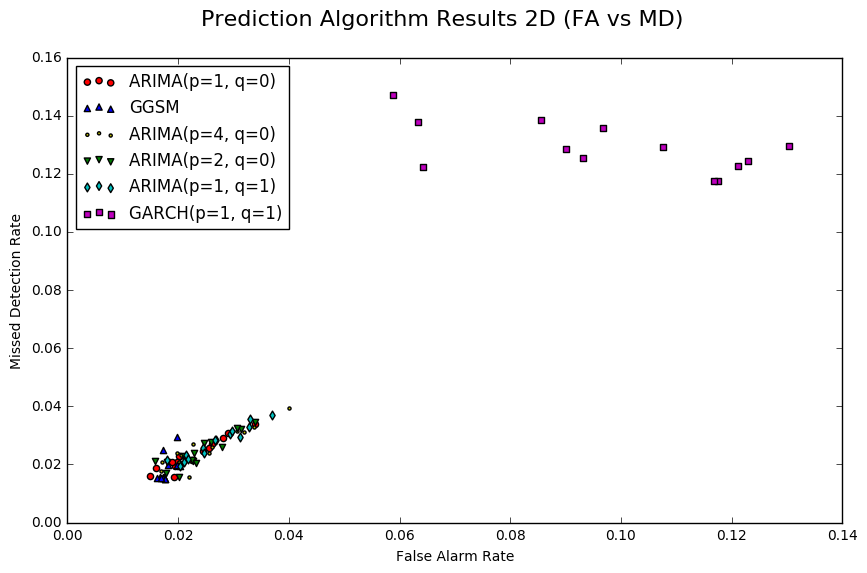

In [35]:
fig = plt.figure(figsize=(10, 6))
fig.suptitle('Prediction Algorithm Results 2D (FA vs MD)', fontsize=16)
ax = fig.add_subplot(111)
ax.set_xlabel('False Alarm Rate')
ax.set_ylabel('Missed Detection Rate')

colors_and_markers = [('r', 'o'), ('b', '^'), ('y', '.'), ('g', 'v'),
                      ('c', 'd'), ('m', 's'), ('k', 'p')]
count = 0

for algorithm, algorithm_result in algorithm_results.iteritems():
    x = [r[1] for r in algorithm_result]
    y = [r[2] for r in algorithm_result]
    c, m = colors_and_markers[count]
    count += 1
    ax.scatter(x, y, c=c, marker=m, label=algorithm)
    
plt.legend(loc='upper left')

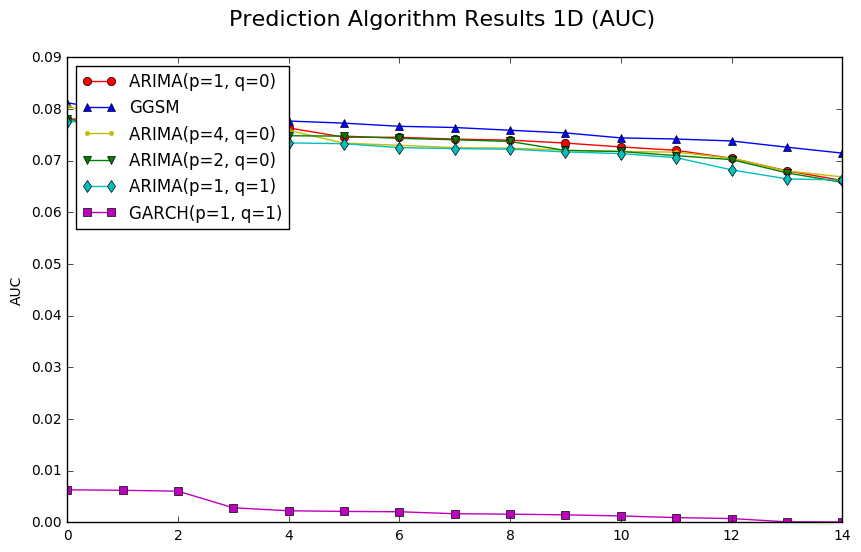

In [45]:
fig = plt.figure(figsize=(10, 6))
fig.suptitle('Prediction Algorithm Results 1D (AUC)', fontsize=16)
ax = fig.add_subplot(111)
ax.set_ylabel('AUC')

colors_and_markers = [('r', 'o'), ('b', '^'), ('y', '.'), ('g', 'v'),
                      ('c', 'd'), ('m', 's'), ('k', 'p')]
count = 0

for algorithm, algorithm_result in algorithm_results.iteritems():
    x = [r[0] for r in algorithm_result]
    c, m = colors_and_markers[count]
    count += 1
    ax.plot(x, c=c, marker=m, label=algorithm)
    
plt.legend(loc='upper left')

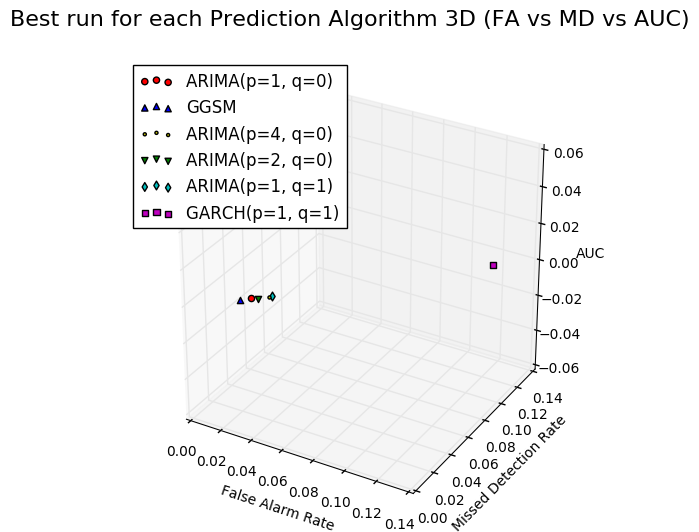

In [39]:
fig = plt.figure(figsize=(6, 6))
fig.suptitle('Best run for each Prediction Algorithm 3D (FA vs MD vs AUC)', fontsize=16)
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('False Alarm Rate')
ax.set_ylabel('Missed Detection Rate')
ax.set_zlabel('AUC')

count = 0

for algorithm, algorithm_result in algorithm_results.iteritems():
    x = [algorithm_result[0][1]]
    y = [algorithm_result[0][2]]
    z = [algorithm_result[0][0]]
    c, m = colors_and_markers[count]
    count += 1
    ax.scatter(x, y, c=c, marker=m, label=algorithm)
    
plt.legend(loc='upper left')

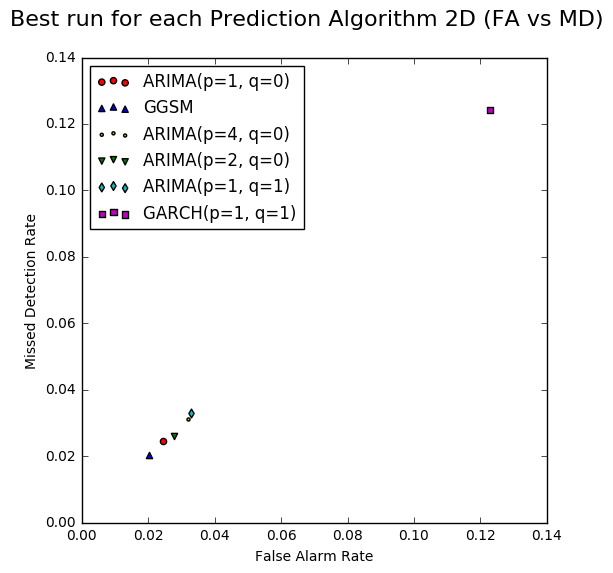

In [40]:
fig = plt.figure(figsize=(6, 6))
fig.suptitle('Best run for each Prediction Algorithm 2D (FA vs MD)', fontsize=16)
ax = fig.add_subplot(111)
ax.set_xlabel('False Alarm Rate')
ax.set_ylabel('Missed Detection Rate')

count = 0

for algorithm, algorithm_result in algorithm_results.iteritems():
    x = [algorithm_result[0][1]]
    y = [algorithm_result[0][2]]
    c, m = colors_and_markers[count]
    count += 1
    ax.scatter(x, y, c=c, marker=m, label=algorithm)
    
plt.legend(loc='upper left')

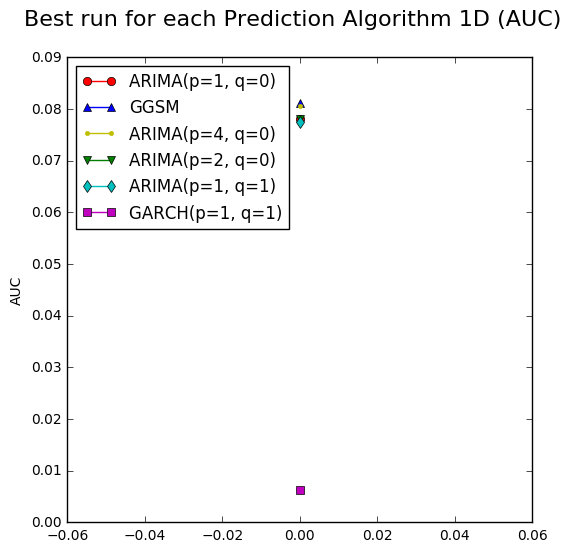

In [44]:
fig = plt.figure(figsize=(6, 6))
fig.suptitle('Best run for each Prediction Algorithm 1D (AUC)', fontsize=16)
ax = fig.add_subplot(111)
ax.set_ylabel('AUC')

count = 0

for algorithm, algorithm_result in algorithm_results.iteritems():
    x = [algorithm_result[0][0]]
    c, m = colors_and_markers[count]
    count += 1
    ax.plot(x, c=c, marker=m, label=algorithm)
    
plt.legend(loc='upper left')